In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from collections import Counter

In [3]:
warnings.filterwarnings("ignore")

Carga de los DataFrames desde los Parquet

In [4]:
games=pd.read_parquet("games.parquet")
items=pd.read_parquet("items.parquet")
reviews=pd.read_parquet("reviews.parquet")

Hacemos el Merge entre los DF Games y Reviews 

In [7]:
reviews.head(10)

,index,user_id,item_id,helpful,recommend,año,sentiment_analysis
0,0,76561197970982479,1250,No ratings yet,True,2011,2
1,0,76561197970982479,22200,No ratings yet,True,2011,2
2,0,76561197970982479,43110,No ratings yet,True,2011,2
3,1,js41637,251610,15 of 20 people (75%) found this review helpful,True,2014,2
4,1,js41637,227300,0 of 1 people (0%) found this review helpful,True,2013,2
5,1,js41637,239030,1 of 4 people (25%) found this review helpful,True,2013,2
6,2,evcentric,370360,No ratings yet,True,2015,2
7,2,evcentric,237930,No ratings yet,True,2014,2
8,2,evcentric,263360,No ratings yet,True,2014,1
9,2,evcentric,107200,No ratings yet,True,2014,2


In [48]:
merge_df = pd.merge(games, reviews, left_on="id", right_on = "item_id")

In [49]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   32133 non-null  object 
 1   tags                       32133 non-null  object 
 2   price                      32133 non-null  float64
 3   id                         32133 non-null  int64  
 4   developer                  32133 non-null  object 
 5   release_year               32133 non-null  int64  
 6   Accounting                 32133 non-null  int32  
 7   Action                     32133 non-null  int32  
 8   Adventure                  32133 non-null  int32  
 9   Animation &amp; Modeling   32133 non-null  int32  
 10  Audio Production           32133 non-null  int64  
 11  Casual                     32133 non-null  int32  
 12  Design &amp; Illustration  32133 non-null  int32  
 13  Early Access               32133 non-null  int

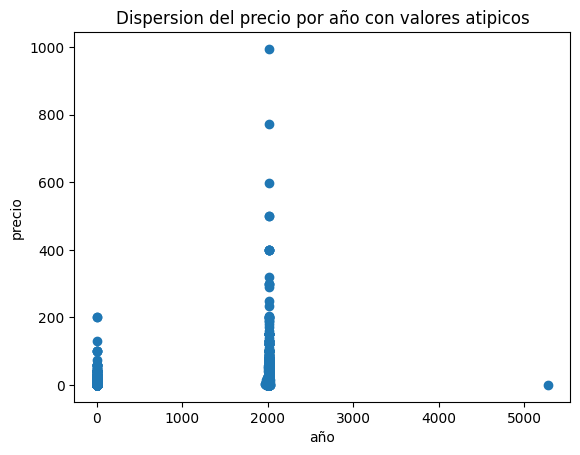

In [28]:
plt.scatter(games['release_year'], games ['price'])

plt.xlabel('año')
plt.ylabel('precio')
plt.title('Dispersion del precio por año con valores atipicos')
plt.show()

Estadisticas sobre columna precio:

In [29]:
games['release_year'].describe()

count    32133.00000
mean      1878.99860
std        505.63735
min          0.00000
25%       2014.00000
50%       2016.00000
75%       2017.00000
max       5275.00000
Name: release_year, dtype: float64

Identificacion de outliers en la columna precio y los eliminamos

In [30]:
# Calcula el primer y tercer cuartil de price
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
df_games_outliers = games[(games['price'] >= lower_bound) & (games['price'] <= upper_bound)]

In [32]:
df_games_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30259 entries, 0 to 32132
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   30259 non-null  object 
 1   tags                       30259 non-null  object 
 2   price                      30259 non-null  float64
 3   id                         30259 non-null  int64  
 4   developer                  30259 non-null  object 
 5   release_year               30259 non-null  int64  
 6   Accounting                 30259 non-null  int64  
 7   Action                     30259 non-null  int64  
 8   Adventure                  30259 non-null  int64  
 9   Animation &amp; Modeling   30259 non-null  int64  
 10  Audio Production           30259 non-null  int64  
 11  Casual                     30259 non-null  int64  
 12  Design &amp; Illustration  30259 non-null  int64  
 13  Early Access               30259 non-null  int64  


In [33]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   item_id           int32  
 4   item_name         object 
 5   playtime_forever  float64
 6   playtime_2weeks   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 255.6+ MB


In [34]:
top_games = items.sort_values(by = 'playtime_forever', ascending  = False).head(10)

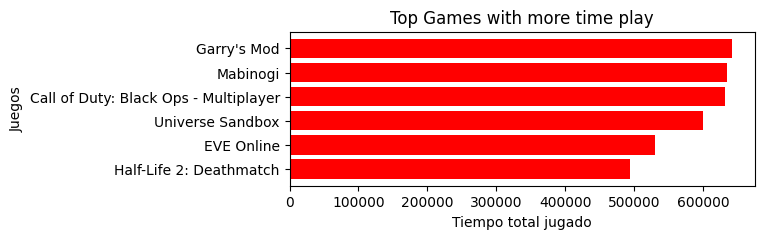

In [36]:
plt.figure(figsize=(6, 2))

plt.barh(top_games['item_name'], top_games['playtime_forever'], color= 'red')
plt.xlabel('Tiempo total jugado')
plt.ylabel('Juegos')
plt.title('Top Games with more time play')

plt.gca().invert_yaxis()

plt.show()

In [37]:
genres_list = ['Accounting','Action', 'Adventure', 'Animation &amp; Modeling','Casual','Design &amp; Illustration', 'Early Access','Education','Free to Play', 'Indie', 'Massively Multiplayer','Photo Editing', 'RPG', 'Racing', 'Simulation','Software Training', 'Sports', 'Strategy','Utilities', 'Video Production', 'Web Publishing']

for column_name in genres_list:
    games[column_name] = games[column_name].astype('int32')
    

In [38]:
def frequency_counter(df, column_names):
    result_list = []
    for column_name in column_names:
        frequency = round(len(df.loc[df[column_name] == 1]), 2)
        result_list.append((column_name, frequency))
    result_dict = dict(result_list)
    counter_result = Counter(result_dict)
    return counter_result


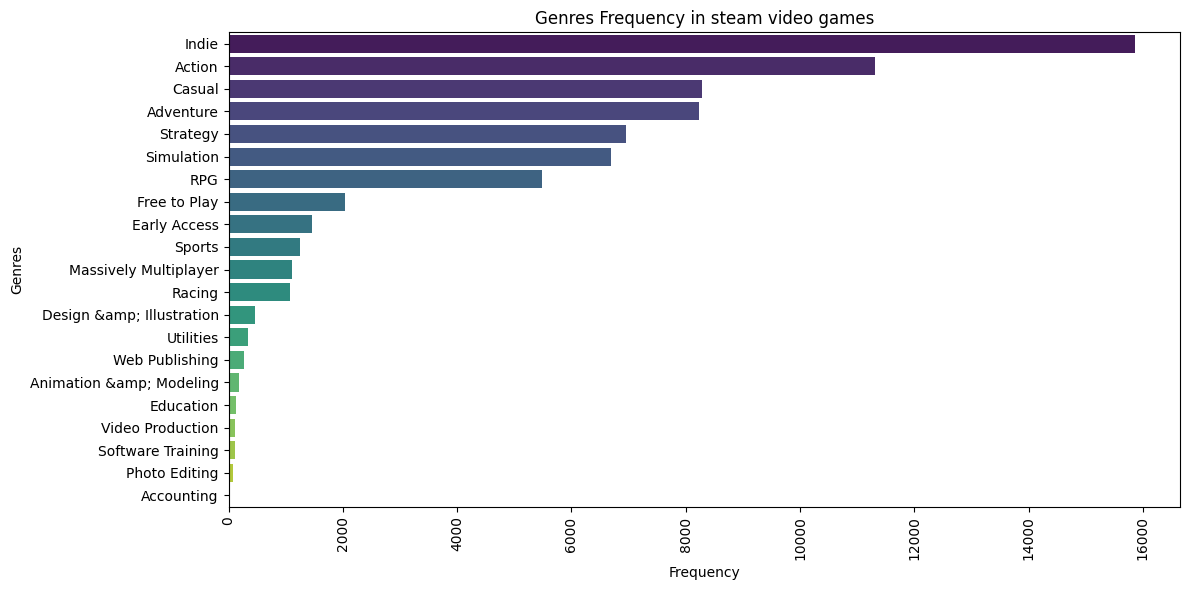

In [40]:
counter_result_list = frequency_counter(games, genres_list)
datos = counter_result_list
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frequency'])
datos = datos.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y=datos.index, data=datos, palette='viridis')

plt.xticks(rotation=90)

plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Genres Frequency in steam video games')

plt.tight_layout()
plt.show()

In [41]:
reviews['recommend'] = reviews ['recommend'].astype(int)


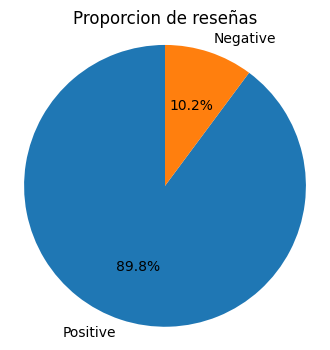

In [42]:
plt.figure(figsize=(4,4))

num_pos = len(reviews[reviews['recommend'] == 1])
num_neg = len(reviews[reviews['recommend'] == 0])


plt.pie([num_pos, num_neg], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporcion de reseñas')

plt.show()


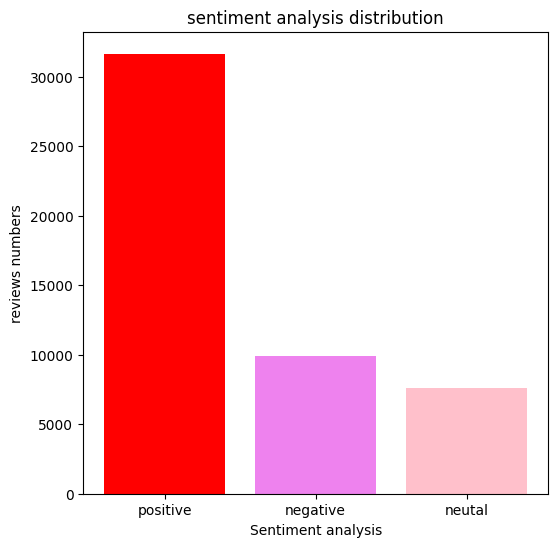

In [47]:
plt.figure(figsize=(6,6))


num_positive = len(reviews[reviews['sentiment_analysis']== 2])
num_negative = len(reviews[reviews['sentiment_analysis']== 1])
num_neutral = len(reviews[reviews['sentiment_analysis']== 0])


plt.bar(['positive', 'negative', 'neutal'], [num_positive, num_negative, num_neutral], color = ['red', 'violet', 'pink'])
plt.xlabel('Sentiment analysis')
plt.ylabel('reviews numbers')
plt.title('sentiment analysis distribution')

plt.show()


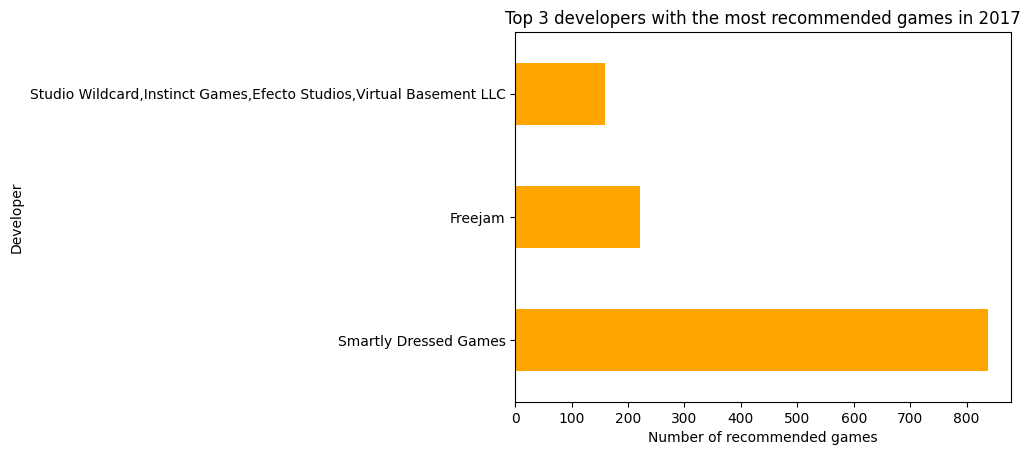

In [50]:
df_year = merge_df[(merge_df['release_year'] == 2017) & (merge_df['recommend'] == True)]

top_developers = df_year['developer'].value_counts().head(3)


top_developers.plot.barh(color='orange')
plt.title('Top 3 developers with the most recommended games in 2017')
plt.xlabel('Number of recommended games')
plt.ylabel('Developer')
plt.show()

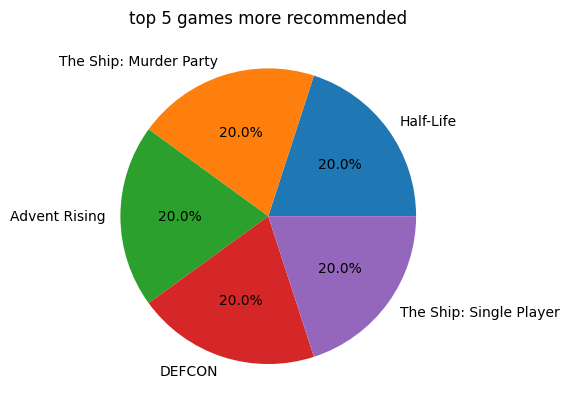

In [56]:

# Seleccionar las 5 filas con los valores más grandes en 'recommend'
top_recomendados = merge_df.drop_duplicates(subset='app_name').nlargest(5, 'recommend')

# Crear un gráfico de torta  que muestra el nombre del juego y la cantidad de recomendaciones
plt.pie(top_recomendados['recommend'], labels=top_recomendados['app_name'], autopct='%1.1f%%')
plt.title('top 5 games more recommended')
plt.show()